In [43]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
df = pd.read_excel('OrderData + ChildData.xlsx')
df.head()

,Customer Shipment Date,Quantity,Product Amount,Shipment To State,State Full Name,Age group,TimeFrame,Population
0,2021-06-28,1,31.99,CA,CALIFORNIA,0 to 4,2019,2383716
1,2021-06-28,1,23.03,CA,CALIFORNIA,0 to 4,2019,2383716
2,2021-06-27,1,23.03,CA,CALIFORNIA,0 to 4,2019,2383716
3,2021-06-26,1,31.99,CA,CALIFORNIA,0 to 4,2019,2383716
4,2021-06-26,1,28.79,CA,CALIFORNIA,0 to 4,2019,2383716


In [45]:
def correlation_analysis(state='CALIFORNIA'):
    """ 변수 간 상관관계 분석 함수"""
    df = pd.read_excel('OrderData + ChildData.xlsx')
    # 일별 판매량, 매출
    
    data = df.loc[df['State Full Name'] == state].groupby(['Customer Shipment Date']).sum()[['Product Amount', 'Quantity']]
    data.reset_index(inplace=True)
    data.rename(columns={'Customer Shipment Date': 'date_time'}, inplace=True)

    state = state[0] + state[1:].lower()
    # 날씨 데이터 로드
    weather_df =  pd.read_csv('./data/'+state+'.csv')

    # dataframe merge 매출 + 영유아 인구수 + 날씨 데이터 
    df = pd.merge(data, weather_df, how='left', on=['date_time'])
    
    avgtempC = (df['maxtempC'] + df['mintempC']) // 2
    df['avgtempC'] = avgtempC
    colormap = plt.cm.PuBu 
    plt.figure(figsize=(20, 16)) 
    plt.title("Person Correlation of Features", y = 1.05, size = 15) 
    # columns_to_drop = ['date_time', 'moonrise','moonset','sunrise','sunset', 'location','visibility','winddirDegree','windspeedKmph','totalSnow_cm','DewPointC','HeatIndexC','precipMM','cloudcover','moon_illumination','WindGustKmph','pressure']
    columns_to_drop = ['date_time', 'moonrise','moonset','sunrise','sunset', 'location']
    sns.heatmap(df.drop(columns_to_drop, axis=1).astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# Target 변수 (Quantity) 와 상관계수가 높은 변수 추출
1. maxtempC (0.25)
2. mintempC (0.25)
3. AvgTemp (0.24)
4. FeelsLikeC (0.23)
5. HeatIndexC (0.23)
6. WindChillC (0.22)


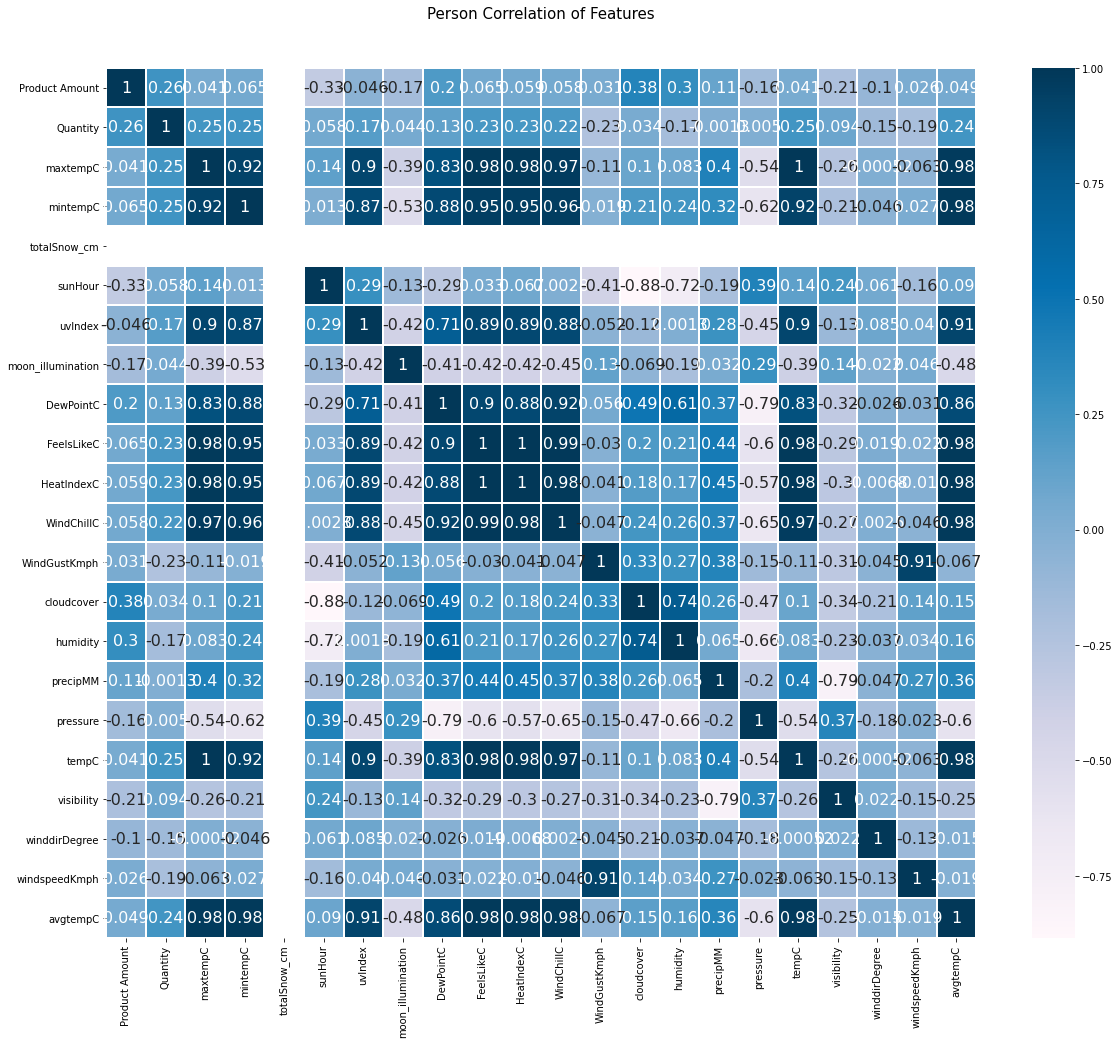

In [46]:
correlation_analysis(state='TEXAS')

In [47]:
def merge_order_child_weather_data(state='CALIFORNIA'):
    """ 주 별 영유아 인구수 + 날씨 + 판매 데이터 df 생성 함수 """
    df = pd.read_excel('OrderData + ChildData.xlsx')
    # 일별 판매량, 매출
    
    data = df.loc[df['State Full Name'] == state].groupby(['Customer Shipment Date']).sum()[['Product Amount', 'Quantity']]
    data.reset_index(inplace=True)
    data.rename(columns={'Customer Shipment Date': 'date_time'}, inplace=True)

    state = state[0] + state[1:].lower()
    # 날씨 데이터 로드
    weather_df =  pd.read_csv('./data/'+state+'.csv')

    # dataframe merge 매출 + 영유아 인구수 + 날씨 데이터 
    df = pd.merge(data, weather_df, how='left', on=['date_time'])

    filtered_df = df.loc[:,[
        'date_time',
        'Quantity',
        'maxtempC',
        'mintempC',
        'FeelsLikeC',
        'HeatIndexC',
        'WindChillC',
        
    ]]
    # 평균기온 구하기
    avgtempC = (filtered_df['maxtempC'] + filtered_df['mintempC']) // 2
    filtered_df['avgtempC'] = avgtempC

    return filtered_df

In [48]:
merged_data = merge_order_child_weather_data(state='CALIFORNIA')
merged_data.head()


,date_time,Quantity,maxtempC,mintempC,FeelsLikeC,HeatIndexC,WindChillC,avgtempC
0,2020-07-02,1,32.0,18.0,25.0,25.0,25.0,25.0
1,2020-07-09,2,37.0,19.0,29.0,29.0,29.0,28.0
2,2020-07-21,1,38.0,22.0,31.0,31.0,31.0,30.0
3,2020-08-30,1,34.0,19.0,27.0,27.0,27.0,26.0
4,2020-09-12,1,34.0,19.0,27.0,27.0,27.0,26.0
